In [1]:
import cv2
import glob, os
import numpy as np
import pandas as pd

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory "' +  directory + '"')
        
def updateMemberList():
    try:
        df = pd.read_csv('name.csv')
    except:
        df = pd.DataFrame(columns=['name'])

    # Validate name
    print('Plese enter your name ... ')
    while(True):
        name = input()
        if not [name] in df[['name']].values:
            df.loc[len(df[['name']])] = [name]
            break
        else:
            print('The name does exist.')
            
    # Save to csv file
    df[['name']].to_csv('name.csv', index=False)
    return name

def validateDataset(name, x):
    avg = int(np.average(x))
    std = int(np.std(x))
    path = 'dataset/' + name + '/'
    ct = 0
    for file in os.listdir(path):
        if '{}_'.format(x.shape[0]) in file:
            img = np.load(path + file)
            if img.shape[0] > avg+std or img.shape[0] < avg-std:
                os.remove(path + file)
            else:
                ct += 1
    print('Collect {} = {} pic.'.format(name, ct))
    return ct

def detectFace(image):
    crop = None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))
    # Draw a rectangle around the faces
    if(len(faces) > 0):
        x, y, w, h = faces[-1]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        crop = gray[y:y+h+1, x:x+w+1] # Crop only face
    return image, crop

def cameraCap():
    # Capture loop
    cap = cv2.VideoCapture(0)
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Face Recognition
    if mode == 1:
        # Update new member
        name = updateMemberList()
        
        # Create member-dataset folder
        datasetPath = 'dataset/' + name
        createFolder(datasetPath)
        
        x = np.array([])
        left = n
        ct = 0
        while(True):
            # Capture frame-by-frame
            ret, frame = cap.read()

            # Detect faces in the image
            frame, crop = detectFace(frame)
            
            # Collect face image
            if not (crop is None) :
                ct += 1
                np.save(datasetPath + '/' + name + '{}_{}'.format(left, ct), crop)                
                # Display number of image
                cv2.putText(img = frame, text = str(ct), org = (int(frameWidth/2 - 300),
                            int(frameHeight/2 + 200)), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 3,
                            color = (0, 255, 0), thickness = 10)
                x = np.append(x, [crop.shape[0]])
            
            # Display capture image
            cv2.imshow(modeList[mode], frame)    
            # Validate dataset
            if cv2.waitKey(1) & ct == left:
                left = left - validateDataset(name, x)
                if left == 0:
                    break
                else:
                    x = np.array([])
                    ct = 0
            
    # Face Identification
    elif mode == 2:
        df = pd.read_csv('name.csv')
        nameList = df[['name']].values
        while(True):
            # Capture frame-by-frame
            ret, frame = cap.read()

            # Detect faces in the image
            frame, crop = detectFace(frame)
            
            # Identify face
#             result = model.perdict(crop)
#             cv2.putText(img = frame, text = nameList[result], org = (int(frameWidth/2 - 300),int(frameHeight/2 + 200)),
#                         fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 3, color = (0, 255, 0), thickness = 10)

            # Display the resulting frame
            cv2.imshow(modeList[mode],frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Release the capture
    cap.release()
    cv2.destroyAllWindows()

    
#------------------------------------------ MAIN ---------------------------------------------------

# folderName = 'Member'

modeList = ['', 'Face Recognition', 'Face Identification']
n = 100

# # Load model
# model = 

# Search & create the haar cascade
for casc in glob.glob('*.xml'):
    print(casc)
cascPath = glob.glob('*.xml')[0]
faceCascade = cv2.CascadeClassifier(cascPath)

# Load name.csv to dataframe
df = pd.read_csv('name.csv')

while(True):
    print('Mode :')
    for i, m in enumerate(modeList):
        if i :
            print('\t{} = {}'.format(i, m))
    print('\t0 = Exit')
    mode = int(input('\nPlese select mode ... '))
    if mode == 0:
        break
    
    # Main process
    cameraCap()
    
    if mode == 1:
        # Train/Update model
        pass
    


haarcascade_frontalface_default.xml
Mode :
	1 = Face Recognition
	2 = Face Identification
	0 = Exit

Plese select mode ... 1
Plese enter your name ... 
asd
[ 41.  50.  48.  49.  51.  53.  54.  52.  51.  52.  52.  52.  52.  53.
  54.  54.  53.  52.  53.  53.  52.  53.  53.  52.  54.  54.  54.  53.
  52.  51.  54.  52.  54.  53.  53.  53.  54.  51.  49.  48.  49.  50.
  49.  48.  49.  39.  45.  45.  44.  53.  55.  55.  55.  54.  55.  51.
  52.  52.  53.  53.  54.  53.  53.  53.  55.  55.  54.  52.  53.  50.
  49.  52.  53.  49. 132. 128. 131. 147. 143. 148. 145. 139. 149. 142.
 144. 145. 147. 146. 146. 145. 139. 125. 119. 106.  97.  94.  94.  89.
  85.  79.]
Collect asd : 81 pic.
[73. 69. 68. 69. 66. 67. 65. 66. 65. 67. 65. 67. 68. 65. 67. 67. 66. 66.
 67.]
Collect asd : 12 pic.
[64. 66. 67. 67. 70. 68. 67.]
Collect asd : 5 pic.
[70. 67.]
Collect asd : 1 pic.
[67.]
Collect asd : 1 pic.
Mode :
	1 = Face Recognition
	2 = Face Identification
	0 = Exit

Plese select mode ... 0


asd


C:\Users\dolla\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


97 from avg = 141(-16)
dolla
86 from avg = 188(-6)
test
80 from avg = 146(-36)


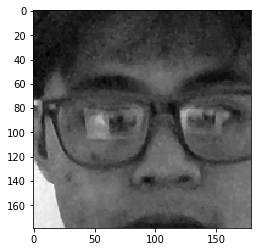

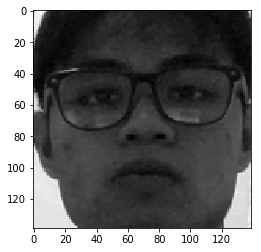

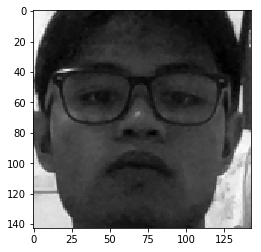

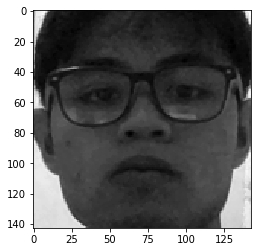

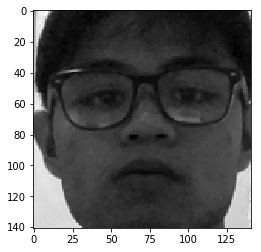

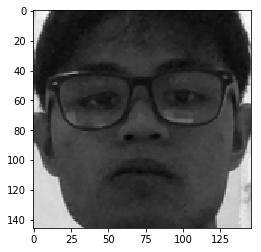

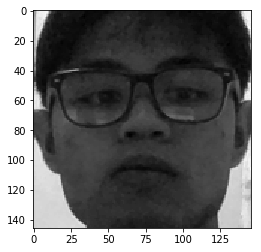

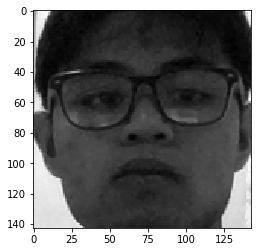

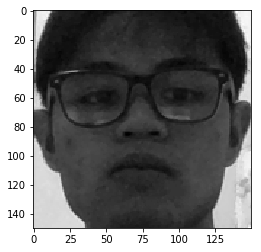

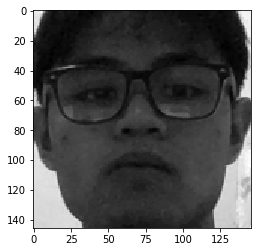

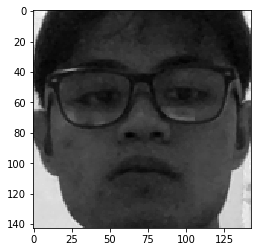

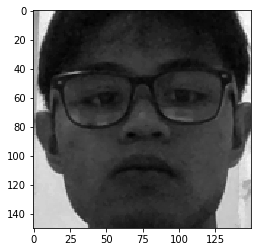

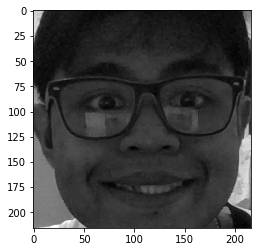

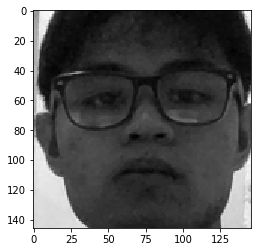

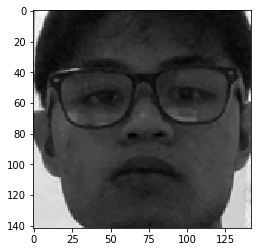

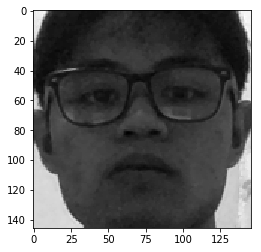

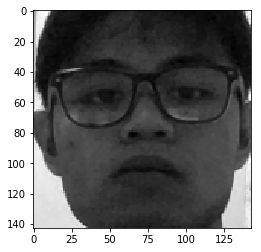

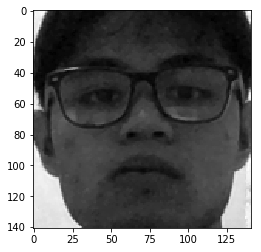

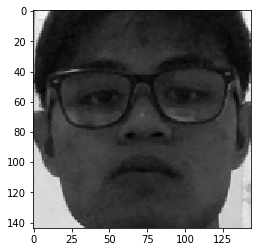

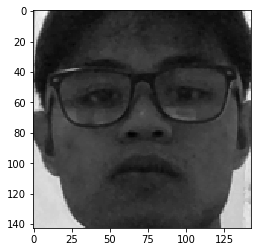

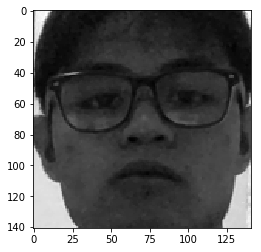

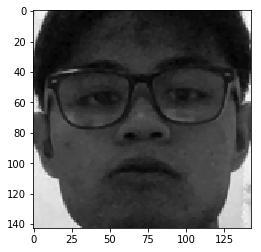

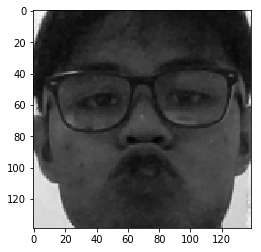

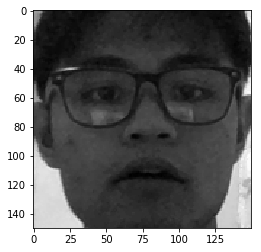

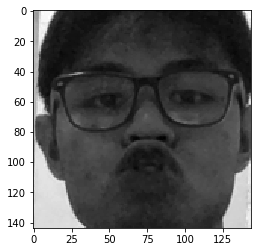

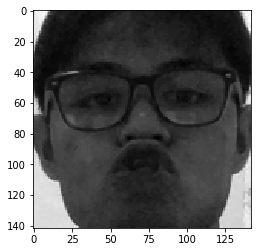

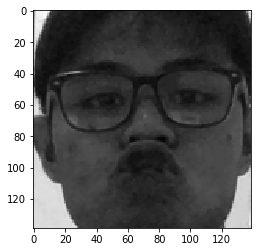

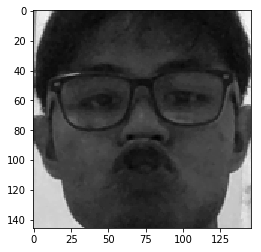

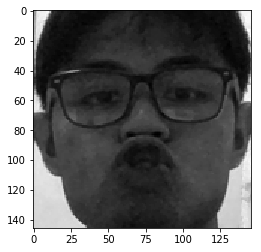

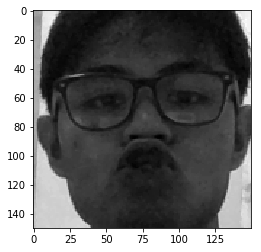

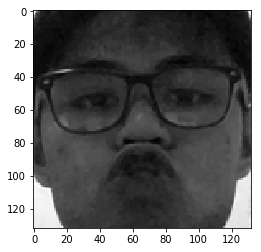

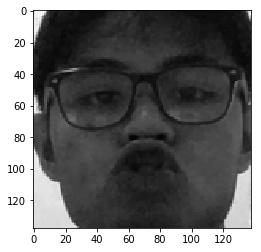

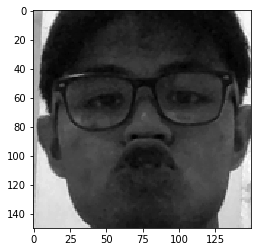

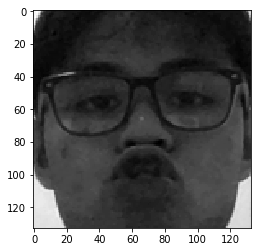

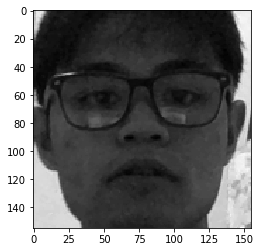

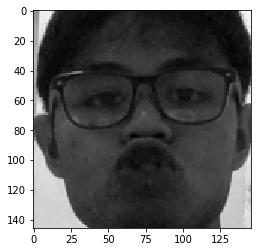

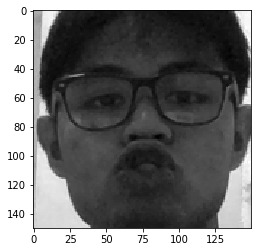

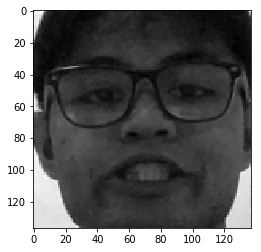

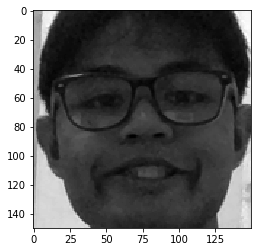

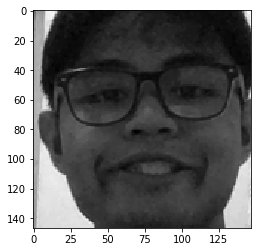

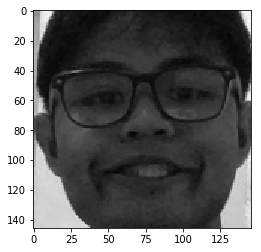

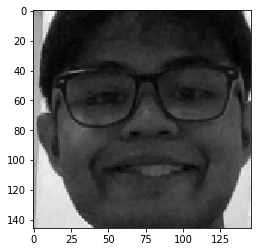

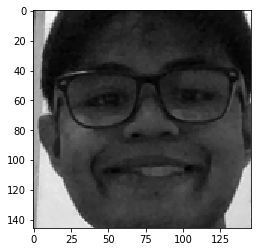

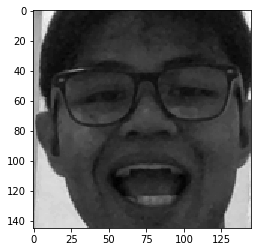

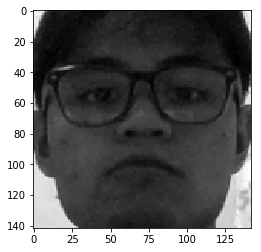

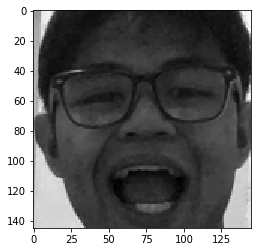

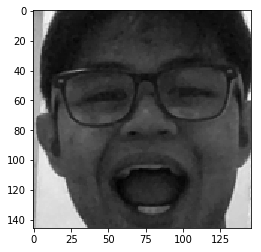

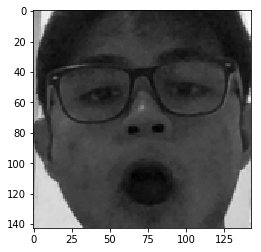

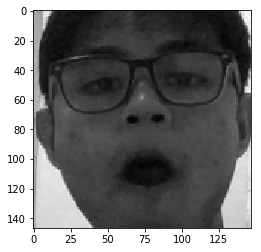

In [ ]:
# Display dataset
import glob, os
import numpy as np
import matplotlib.pyplot as plt

n = 100

for ds in os.listdir('dataset'):
    print(ds)
    x = np.array([])
    for file in glob.glob('dataset/' + ds + '/*.npy'):
        img = np.load(file)
        x = np.append(x, [img.shape[0]])
#     print(x)
    avg = int(np.average(x))
    std = int(np.std(x))
    ct = 0
    for file in glob.glob('dataset/' + ds + '/*.npy'):
        img = np.load(file)
#         print(file, '->', img.shape)
        if img.shape[0] >= avg-std:
            ct += 1
#             plt.figure()
#             plt.imshow(img, cmap='gray')
#             print(file, '->', img.shape)
    print(ct, ' from avg = ', avg, '(-', std, ')', sep='')
    